## Filtration
A stochastic process, X(t) is a collection of random variables indexed by a time variable $t$. <br>
For the future we do not know the precise path  but we may simulate the future according to some asset price distribution.

Filtration figure, with $\mathcal{F}_{t_0}, \mathcal{F}_{T_1},  \mathcal{F}_{T_2}, ...  \mathcal{F}_{T_m}$
<br>
When $X(t)$ is  $\mathcal{F}_{t_0}$ measurable this implies that at time $t_0$ the value of $X(t)$ is known. $X(T_1)$ is $\mathcal{F}(T_1)$ measurable, but $X(T_1)$ is a future realization which is  not yet known at time $t_0$ today and thus is not $\mathcal{F}_{t_0}$ measurable

A stochastic process $X(t), t>0$ is said to be adapted to the filtration $\mathcal{F}(t)$, if 
$$ \sigma(X(t)) \in \mathcal{F}(t)$$
By the term adapted process we mean that a stochastic process cannot look into the future. In other words for a stochastic process $X(t)$ its realizations (paths), $X(s)$ for $0\leq s \leq t$ are known at time s but not yet at time t

## Conditional Expectations
Another important concept is the concept of iterated expectations. The law of iterated expectations, also called the tower property. 
<br>
It states that for any given random variable $X \in L^2$ Hilbert space where $\mathbb{E}[X^2(t)] < \infty$ which is the defined on a probability space $(\Omega,\mathcal{F}$,$\mathcal{Q})$ and for any filtration $\mathcal{G} \in \mathcal{F}$, the following equality holds:
$$ \mathbb{E}[X|\mathcal{G}] = \mathbb{E}[\mathbb{E}[X|\mathcal{F}]| \mathcal{G}]$$ 
$$\mathbb{E}[f(X,Y)]= \mathbb{E}[\mathbb{E}[f(X,Y=y)|Y]]$$

If we consider another random variable Y, which is defined on the sigma-field $\mathcal{G}$, then the above equality can be written as:
$$ \mathbb{E}[Y] = \mathbb{E}[\mathbb{E}[Y|X]]

Assuming that both random variables $X$ and $Y$ are continuos on $\mathbb{R}$ and are defined on the same filtration, we can prove:
$$\mathbb{E}[\mathbb{E}[Y|X]]= \int_{\mathbb{R}}\mathbb{E}[Y|X=x] f_X(x)dx$$
$$\mathbb{E}[\mathbb{E}[Y|X]]= \int_{\mathbb{R}}\bigg(\int_{\mathbb{R}}yf_{Y|X}(y|x)\bigg)f_X(x)dx$$


By the definition of the conditional density: $f_{Y|X}(y|x)= f_{Y,X}(y,x)/f_X(x)$ we have

$$\mathbb{E}[\mathbb{E}[Y|X]]= \int_{\mathbb{R}}\bigg(\int_{\mathbb{R}}y\frac{f_{Y,X}(y,x)}{f_X(x)}dy\bigg)f_X(x)dx$$
$$\mathbb{E}[\mathbb{E}[Y|X]]= \int_{\mathbb{R}}y\bigg(\int_{\mathbb{R}}f_{Y,X}(y,x)dx\bigg)dy$$
$$ \mathbb{E}[Y] = \int_{\mathbb{R}} yf_Y(y)dy$$


Show by means of Monte Carlo simulation that 
- $\mathbb{E}[W(t) | \mathcal{F}(t_0)] = W(t_0) \text{ for }t_0=0$
- $\mathbb{E}[W(t) | \mathcal{F}(s)] = W(s) \text{ for } s<t$


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.7755575615628914e-17, 0.0, 0.0, -4.440892098500626e-16, 0.0, 0.0, -2.7755575615628914e-17, 0.0, 0.0, 0.0, 4.440892098500626e-16, 0.0, 0.0, 4.163336342344337e-17, -1.1102230246251565e-16, 0.0, 0.0, 0.0, 4.440892098500626e-16, 1.1102230246251565e-16, 0.0, 4.440892098500626e-16, 4.440892098500626e-16, 0.0, 0.0, 1.1102230246251565e-16, 0.0, -4.440892098500626e-16, 0.0, 0.0, 0.0, 0.0, 0.0, -2.7755575615628914e-17, 0.0, 0.0, 6.938893903907228e-18, -2.5153490401663703e-17, 0.0, -4.440892098500626e-16, -8.881784197001252e-16, 4.440892098500626e-16, 4.440892098500626e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 8.881784197001252e-16, 0.0, -4.440892098500626e-16, 0.0, 0.0, 0.0, 2.7755575615628914e-17, 0.0, 0.0, 0.0, 1.1102230246251565e-16, 0.0, 0.0, 2.220446049250313e-16, 2.7755575615628914e-17, 2.220446049250313e-16, 0.0, 0.0, 0.0, 0.0, 5.551115123125783e-17, 2.7755575615628914e-17, -1.1102230246251565e-16, 6.938893903907228e-17, -2.220446049250313e-16, 0.0, -4.4408920985

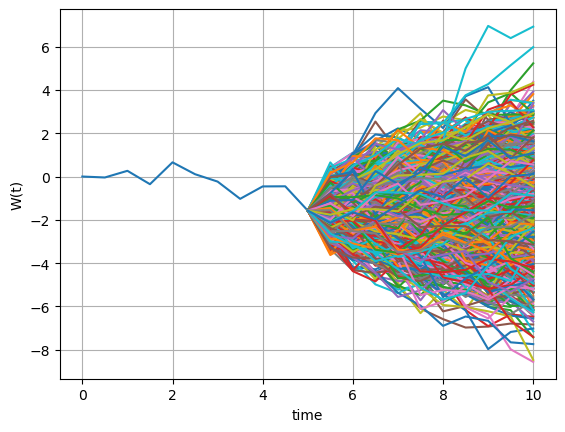

In [6]:
#%%
"""
Simulation of, E(W(t)|F(s)) = W(s) using nested Monte Carlo

"""
import numpy as np
import matplotlib.pyplot as plt
t = 10 
s = 5
NoOfPaths=1000
NoOfSteps=10

# First part to caclulate E(W(t)|F(0)) = W(0)=0
def martingaleA():
    W_t = np.random.normal(0.0,pow(t,0.5),[NoOfPaths,1])
    E_W_t = np.mean(W_t)
    print("mean value equals to: %.2f while the expected value is W(0) =%0.2f " %(E_W_t,0.0))
    
# Second part requiring nested Monte Carlo simulation  E(W(t)|F(s)) = W(s)
def martingaleB():    
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W = np.zeros([NoOfPaths,NoOfSteps+1])
        
    # time-step from [t0,s]
    dt1 = s / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        W[:,i+1] = W[:,i] + pow(dt1,0.5)*Z[:,i]
            
    #W_s is the last column of W
    W_s = W[:,-1]
    #for every path W(s) we perform sub-simulation until time t and calculate
    #the expectation
    # time-step from [s,t]
    dt2     = (t-s)/float(NoOfSteps);
    W_t     = np.zeros([NoOfPaths,NoOfSteps+1]);
    
    #Store the results
    E_W_t = np.zeros([NoOfPaths])
    Error=[]
    for i in range(0,NoOfPaths):
        #Sub-simulation from time "s" until "t"
        W_t[:,0] = W_s[i]
        Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
        for j in range(0,NoOfSteps):
            #this is a scaling that ensures that Z has mean 0 and variance 1
            Z[:,j] = (Z[:,j]-np.mean(Z[:,j])) / np.std(Z[:,j]);
            #path simulation, from "s" until "t"
            W_t[:,j+1] = W_t[:,j] + pow(dt2,0.5)*Z[:,j];        
            
        E_W_t[i]=np.mean(W_t[:,-1])
        Error.append(E_W_t[i]-W_s[i])
        
        #Generate a plot for the first path
        if i==0:
            plt.plot(np.linspace(0,s,NoOfSteps+1),W[0,:])
            for j in range(0,NoOfPaths):
                plt.plot(np.linspace(s,t,NoOfSteps+1),W_t[j,:])
            plt.xlabel("time")
            plt.ylabel("W(t)")
            plt.grid()
        
    print(Error)
    error = np.max(np.abs(E_W_t-W_s))
    print("The error is equal to: %.18f"%(error))
    
martingaleB()
    

## Application of Conditional Expectation
Assuming the following SDE for a stock price:
$$ dS(t)=rS(t)dt + JS(t)dW^{\mathbb{Q}}(t)$$ 
where $J$ represents a certain stochastic volatility random variable which has for example, a lognormal distribution.
$$S(T)=S(0) exp\bigg[\bigg(r - \frac{1}{2}J^2\bigg)T + JW^{\mathbb{Q}}(T)\bigg]$$

A possible solution for the pricing problem is to use the tower property of iterated expectations, to determine the european option prices, conditioned on "realizations" of the volatility process $"J"$

By the tower property using $\mathbb{E}^{\mathbb{Q}} = \mathbb{E}$ the European call value can be reformuled ass a discounted expectation with:
$$\mathbb{E}[max(S(T) - K,0)|\mathcal{F}(t_0)] = \mathbb{E}[\mathbb{E}[max(S(T)-K,0)|J=j]|\mathcal{F(t_0)}]$$

Conditioned on the realizations of the variance process the calculation of the inner expecation is equivalent to the Black-Scholes solution with a time-dependent volatility:
$$ S(T) = S(t_0) exp\bigg[\bigg(r - \frac{1}{2}j^2\bigg)(T - t_0) + j(W^{\mathbb{Q}}(T) - W^{\mathbb{Q}}(t_0))\bigg]$$

The solution of the inner expectation is then given by : 
$$\mathbb{E}[max(S(T)-K,0)|J=j] = e^{-r (T - t_0)} S(t_0) F_{\mathcal{N}(0,1)}(d_1) - K  F_{\mathcal{N}(0,1)}(d_2)$$
with 
- $ d_1 = \frac{ ln \frac{S(t_0)}{K} + (r + \frac{1}{2}j^2)(T - t_0)}{j\sqrt{T - t_0}}$, $d_2 = d_1 - j\sqrt{T - t_0}$ <br>
with $F_{\mathcal{N}(0,1)}$ being the standard normal cumulative distribution function

$$\mathbb{E}[max(S(T) - K,0)] = e^{-r (T - t_0)} S(t_0) \mathbb{E}[F_{\mathcal{N}(0,1)}(d_1)] - K  \mathbb{E}[F_{\mathcal{N}(0,1)}(d_2)]$$

Using conditional expectations have also benefits when we use Monte Carlo simulation.

100
1100
2100
3100
4100
5100
6100
7100
8100
9100


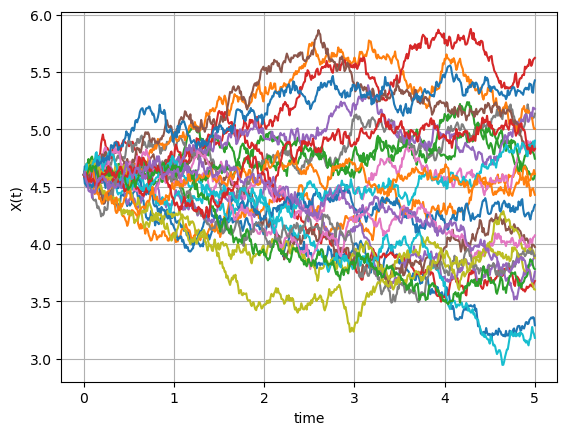

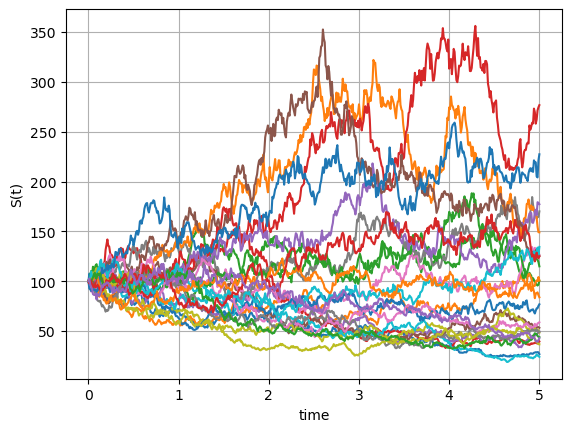

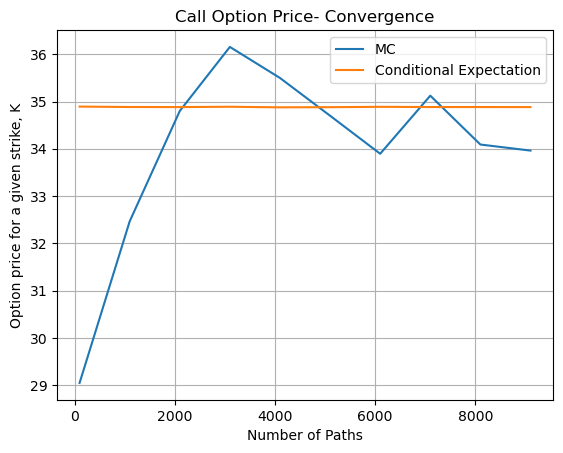

In [7]:
#%%
"""
Impact of conditional expectation pricing (Black-Scholes with Jump volatility)
"""
import numpy as np
import matplotlib.pyplot as plt
import enum
import scipy.stats as st

# This class defines puts and calls
class OptionType(enum.Enum):
    CALL = 1.0
    PUT = -1.0
    
def GeneratePaths(NoOfPaths,NoOfSteps,S0,T,muJ,sigmaJ,r):    
    # Create empty matrices for Poisson process and for compensated Poisson process
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    S = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])
                
    dt = T / float(NoOfSteps)
    X[:,0] = np.log(S0)
    S[:,0] = S0
    
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    J = np.random.normal(muJ,sigmaJ,[NoOfPaths,NoOfSteps])
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
            
        X[:,i+1]  = X[:,i] + (r - 0.5*J[:,i]**2.0)*dt +J[:,i]*np.sqrt(dt)* Z[:,i]
        time[i+1] = time[i] +dt
        
    S = np.exp(X)
    paths = {"time":time,"X":X,"S":S,"J":J}
    return paths

def EUOptionPriceFromMCPaths(CP,S,K,T,r):
    # S is a vector of Monte Carlo samples at T
    if CP == OptionType.CALL:
        return np.exp(-r*T)*np.mean(np.maximum(S-K,0.0))
    elif CP == OptionType.PUT:
        return np.exp(-r*T)*np.mean(np.maximum(K-S,0.0))

def BS_Call_Put_Option_Price(CP,S_0,K,sigma,t,T,r):
    K = np.array(K).reshape([len(K),1])
    d1 = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0))
    * (T-t)) / (sigma * np.sqrt(T-t))
    d2 = d1 - sigma * np.sqrt(T-t)
    if CP == OptionType.CALL:
        value = st.norm.cdf(d1) * S_0 - st.norm.cdf(d2) * K * np.exp(-r * (T-t))
    elif CP == OptionType.PUT:
        value = st.norm.cdf(-d2) * K * np.exp(-r * (T-t)) - st.norm.cdf(-d1)*S_0
    return value

def CallOption_CondExpectation(NoOfPaths,T,S0,K,J,r):
    
    # Jumps at time T
    J_i = J[:,-1]
    
    result = np.zeros([NoOfPaths])
    
    for j in range(0,NoOfPaths):
        sigma = J_i[j]
        result[j] = BS_Call_Put_Option_Price(OptionType.CALL,S0,[K],sigma,0.0,T,r)
        
    return np.mean(result)

def mainCalculation():
    NoOfPaths = 25
    NoOfSteps = 500
    T = 5
    muJ = 0.3
    sigmaJ = 0.005
    
    S0 =100
    r  =0.00
    Paths = GeneratePaths(NoOfPaths,NoOfSteps,S0, T,muJ,sigmaJ,r)
    timeGrid = Paths["time"]
    X = Paths["X"]
    S = Paths["S"]
           
    plt.figure(1)
    plt.plot(timeGrid, np.transpose(X))   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("X(t)")
    
    plt.figure(2)
    plt.plot(timeGrid, np.transpose(S))   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")
    
    # Check the convergence for a given strike
    K = 80
    CP =OptionType.CALL
    
    NGrid = range(100,10000,1000)
    NoOfRuns = len(NGrid)
    
    resultMC = np.zeros([NoOfRuns])
    resultCondExp = np.zeros([NoOfRuns])
       
    for (i,N) in enumerate(NGrid):
            print(N)
            Paths = GeneratePaths(N,NoOfSteps,S0, T,muJ,sigmaJ,r)
            timeGrid = Paths["time"]
            S = Paths["S"]
            resultMC[i] = EUOptionPriceFromMCPaths(CP,S[:,-1],K,T,r)
            
            J = Paths["J"]

            resultCondExp[i]=CallOption_CondExpectation(N,T,S0,K,J,r)
    
    plt.figure(3)
    plt.plot(NGrid,resultMC)  
    plt.plot(NGrid,resultCondExp)
    plt.legend(['MC','Conditional Expectation'])
    plt.title('Call Option Price- Convergence')
    plt.xlabel('Number of Paths')
    plt.ylabel('Option price for a given strike, K')
    plt.grid()
                       
mainCalculation()

## Concept of Numéraire 
- When delaling with involved systems of SDEs, it is sometimes possible to reduce the complexity of the pricing problem by an appropriate measure transformation.
- In Financial Mathematics a numéraire is a tradable entity in terms of whose price the relative prices of all other tradable assets are expressed.
- Under the appropriate numéraire, processes may become martingales. Working with martingales is typically favorable as these processes are free of drift terms.

Consider $X(t)$ to be a "tradable asset" three measures and the corresponding martingale property are as follows. 
- Risk-neutral measure is associated with the money-savings account $M(t)$ as the numeraire,
$$ dX(t) = \bar{\mu}^{\mathbb{Q}}(t) dt + \bar{\sigma}(t)dW^{\mathbb{Q}}(t) \rightarrow \mathbb{E}^{\mathbb{Q}}\bigg[\frac{X(t)}{M(t)}|\mathcal{F}(t_0)\bigg] = \frac{X(t_0)}{M(t_0)}$$
- Forward measure is associated with the ZCB, P(t,T) as the numéraire:
$$ dX(t) = \bar{\mu}^{\mathbb{T}}(t) dt + \bar{\sigma}(t)dW^{\mathbb{T}}(t) \rightarrow \mathbb{E}^{\mathbb{T}}\bigg[\frac{X(t)}{P(t,T)}|\mathcal{F}(t_0)\bigg] = \frac{X(t_0)}{P(t_0,T)}$$
- Stock measure is associated with the stock S(t) as the numéraire:
$$ dX(t) = \bar{\mu}^{\mathbb{S}}(t) dt + \bar{\sigma}(t)dW^{\mathbb{S}}(t) \rightarrow \mathbb{E}^{\mathbb{S}}\bigg[\frac{X(t)}{P(t,T)}|\mathcal{F}(t_0)\bigg] = \frac{X(t_0)}{S(t_0)}

## Girsanov Theorem
Let us consider the following stochastic process for X(t):
$$ dX(t) = \mu^A(X(t))dt + \sigma(X(t))dW^A(t)$$ 
where the brownian motion $dW^A(t)$ is defined under the $\mathbb{Q}^A$ measure, $\mu^A(X(t))$ and $\sigma(X(t))$ satisfy Lipschitz continuity condition. For a drift $\mu^B(X(t)) for which the ratio $$Y(t) =\frac{\mu^B(X(t)) - \mu^A(X(t))}{\sigma(X(t))}$$
we define the measure $\mathbb{Q}^B by:
$$ \frac{d \mathbb{Q}^B}{d\mathbb{Q}^A}\bigg|_{\mathcal{F}(t_0)} = exp\bigg( - \frac{1}{2} \int_0^tY^2(s)ds + \int_0^tY(s)dW^A(s)\bigg)

Then measure $\mathbb{Q}^B$ is equivalent measure to  $\mathbb{Q}^A$. The process $W^B(t)$ defined by:
$$dW^B(t) = dW^A(t) - Y(t)dt$$
is a Brownian motion under $Q^B$ and the process for X(t) under the $\mathbb{Q}^B$ measure is given by:
$$ dX(t) = \mu^B(X(t))dt + \sigma(X(t))dW^B(t)$$

## From $\mathbb{P}$ to $\mathbb{Q}$ in the Black-Scholes model

the stock under the real world measure $\mathbb{P}$:
$$dS(t) =\mu S(t) dt + \sigma S(t) dW^{\mathbb{P}}$$

Under the risk neutral measure  $\mathbb{Q}$, the stock divided by the numéraire (money market account: $dM(t) = rM(t)dt$) is a martingale

Applying Ito's Lemma:
$$ d \frac{S(t)}{M(t)} = \frac{1}{M(t)}dS(t) - \frac{S(t)}{M^2(t)}dM(t).$$
$$ d \frac{S(t)}{M(t)} = \frac{1}{M(t)}( \mu S(t) dt + \sigma S(t) dW^{\mathbb{P}}) -rM(t)\frac{S(t)}{M^2(t)}dt$$
By indicating $S^*(t) = \frac{S(t)}{M(t)}$
$$\frac{dS^*(t)}{S^*(t)} = (\mu - r)dt + \sigma  dW^{\mathbb{P}} $$
Under the risk neutral measure, the ratio $\frac{S(t)}{M(t)}$ should be of the following form:
$$ d \frac{S(t)}{M(t)} = \sigma \frac{S(t)}{M(t)}dW^{\mathbb{Q}}(t)$$

$$ dW^{\mathbb{Q}}(t) = dW^{\mathbb{P}}(t) - \frac{(u-r)}{\sigma}

Under the risk neutral measure, the stock process becomes:
$$ dS(t) = \mu S(t)dt + \sigma S(t)(dW^{\mathbb{P}}(t) -  \frac{(u-r)}{\sigma}dt)$$
$$ dS(t) = r S(t)dt + \sigma S(t)dW^{\mathbb{Q}}(t)$$

## change of Measure: The stock Measure
Assuming the Black-Scholes market, with the money savings account and standard lognormal prices for the stock $S(t)$:
We want to determine the price of the following derivative:
$$ V(t_0) = \mathbb{E}^{\mathbb{Q}}\bigg[ \frac{1}{M(t)} max(S^2(T) - S(T)K,0)| \mathcal{F}(t_0) \bigg]

the distribution of the difference between two lognormal random variables is not known. Therefore calculate the expectation can be tricky. By measure change we can solve this problem in an elegant way. 

We perform the measure transformation, defining the following Radon-Nykodym derivative:
$$ \frac{d\mathbb{Q}^S}{d\mathbb{Q}} = \frac{S(T)}{S(t_0)}\frac{M(t_0)}{M(T)}
$$ \frac{d\mathbb{Q}^S}{d\mathbb{Q}} = \mathbb{E}^{\mathbb{Q}}\bigg[ \frac{1}{M(T)} max (S^2(T) - S(T)K,0)|\mathcal{F}(t_0)\bigg]

So the expectations become:
$$ V(t_0) = \int_{\Omega} \frac{1}{M(T)} max(S^2(T) - SK,0)d\mathbb{Q}$$
$$ V(t_0) =  \int_{\Omega} \frac{1}{M(T)} max(S^2(T)- SK,0) \frac{S(t_0)}{S(T)} \frac{M(T)} {M(t_0)} d\mathbb{Q}^S$$
$$ V(t_0) = \mathbb{E}^S [ \frac{1}{M(T)} max(S^2(T) - SK,0) \frac{S(t_0)}{S(T)} \frac{M(T)} {M(t_0)}| \mathcal{F}(t_0) ]$$
$$  V(t_0) = \mathbb{E}^S [ max(S(T) - K,0) \frac{S(t_0)}{M(t_0)} | \mathcal{F}(t_0)]$$
Considering $M_{t_0}=1$. 
$$ V(t_0) = \mathbb{E}^S [ max(S(T) - K,0) S(t_0)| \mathcal{F}(t_0)]$$
Now we need to check if the dynamic of S under the $\mathbb{Q}^S$ measure is still lognormal. 

Under the $\mathbb{Q}^S$ measure we discount the future values not with the money-savings account but with the Stock account. <br>
Thus $d \frac{M(t)}{S(t)} $ needs to be a martingale, i.e.: we expect the following dynamics:
$$ d \frac{M(t)}{S(t)} = 0 \cdot dt + ? dW^S(t)$$


By Ito's Lemma we have:
$$d \frac{M(t)}{S(t)} =  -\frac{1}{S(t)^2} M(t) \bigg(rS(t)dt + \sigma S(t)dW^Q(t)\bigg) + \frac{1}{S(t)} rM(t)dt + \frac{2}{S^3}M \sigma^2 S(t)^2 dt$$
$$  d \frac{M(t)}{S(t)} =  -\frac{M(t)}{S(t)} \bigg(rdt + \sigma dW^Q(t)\bigg) + r\frac{M(t)}{S(t)} dt + \frac{1}{2} \frac{2M(t)}{S(t)}  \sigma^2 dt$$
$$  d\frac{M(t)}{S(t)} =  -\frac{M(t)}{S(t)} \sigma^2 dt - \sigma \frac{M(t)}{S(t)} dW^{\mathbb{Q}}(t) dt$$

The process $d\frac{M(t)}{S(t)}$ is not a martingale under the $\mathbb{Q}$ measure
$$  dW^{\mathbb{Q}}(t) - \sigma dt = dW^S$$

$$  d\frac{M(t)}{S(t)} = - \sigma \frac{M(t)}{S(t)} dW^{S}(t)$$

So now we know how to derive the dynamics of the stock process $S(t)$ under the $ \mathbb{Q}^S$ measure:
$$ dS(t) = rS(t)dt + \sigma S(t) (dW^S(t) + \sigma dt)$$
$$ dS(t) = (r + \sigma^2)S(t)dt + \sigma S(t) dW^S(t) $$

The distribution of $S(T)$ under the $\mathbb{Q}^S$ is still log-normal, but with adjusted drift parameter. 
Thus finally we can simply evaluate the expectation:
$$ V(t) = S_0 \mathbb{E}^S[max(S(T) - K),0]$$

## Change of Numeraire - Dimension reduction

\begin{cases}
dS_1(t) = rS_1(t)dt +\sigma_1 S_1(t)dW_1(t) \\
dS_2(t) = rS_2(t)dt + \sigma_2 S_2(t)dW_2(t)
\end{cases}

$$ dW_1^{\mathbb{Q}}(t)dW_2^{\mathbb{Q}}(t)= \rho dt$$

How to value the following payoff:
$$ V(t_0,S_1,S_2) = M(t_0)\mathbb{E}^{\mathbb{Q}}\bigg[\frac{1}{M(T)} S_1(T)\mathbb{1}_{S_2(T)>K}\bigg|\mathcal{F}(t_0)\bigg]

Let us consider the stock $S_1(t)$ as the numéraire. Application of the Radon-Nykodym technique gives us the following relation:
$$ \frac{d\mathbb{Q}^{S_1}}{d\mathbb{Q}}\bigg|_{\mathcal{F}(T)} = \frac{S(T)}{S(t_0)} \frac{M(t_0)}{M(T)} $$

Under the new numéraire the value of the derivative becomes:
$$ V(t_0)=M(t_0) \mathbb{E}^{S_1}\bigg[ \frac{S_1(T)}{M(T)}\mathbb{1}_{S_2(T)>K} \frac{S_1(t_0)M(T)}{S_1(T)M(t_0)}\bigg|\mathcal{F}(t_0)\bigg]$$
$$ V(t_0)=S_1(t_0)  \mathbb{E}^{S_1}\bigg[\mathbb{1}_{S_2(T)>K}\bigg|\mathcal{F}(t_0)\bigg] $$ 
$$ S_1(t_0) \mathbb{Q}^{S_1}\bigg[S_2(T)>K\bigg|\mathcal{F}(t_0)\bigg]$$

Under the new stock-measure we need to ensure that all the market underlying processes are martingales

By Ito's lemma we have:
$$d \bigg(\frac{M(t)}{S_1(t)}\bigg) = \frac{1}{S_1(t)}dM(t) - \frac{M(t)}{S^2_1(t)} dS_1(t) + \frac{M(t)}{S^3_1(t)} (dS_1(t)^2) $$
$$d \bigg(\frac{M(t)}{S_1(t)}\bigg) = \frac{M(t)}{S_1(t)} \bigg(\sigma^2_1 dt - \sigma_1dW_1^{\mathbb{Q}}(t)\bigg) $$
This implies that the following measure transformation:
$$dW_1^{\mathbb{Q}}(t) = dW_1^{S_1}(t) + \sigma_1 dt$$

Therefore the stock dynamics under the $\mathbb{Q}^S_1$ measure is given by:
$$ \frac{dS_1(t)}{S_1(t)} = (r + \sigma^2_1)dt + \sigma_1 dW_1^{S_1}(t)$$

For the second stock we have:
$$  \frac{dS_2(t)}{S_1(t)}\bigg/ \bigg(\frac{S_2(t)}{S_1(t)}\bigg) = \bigg(\sigma_1^2 - \rho\sigma_1\sigma_2\bigg) dt + \sigma_2dW_2^{\mathbb{Q}}(t) - \sigma_1dW_1^{\mathbb{Q}}(t)$$
$$  \frac{dS_2(t)}{S_1(t)}\bigg/ \bigg(\frac{S_2(t)}{S_1(t)}\bigg) = - \rho\sigma_1\sigma_2 dt + \sigma_2dW_2^{\mathbb{Q}}(t) - \sigma_1dW_1^{S_1}(t)$$


The expression above implies the following change of measure for the brownian motion in the second stock process $dW_2^{\mathbb{Q}}(t)$
$$dW_2^{\mathbb{Q}}(t) = dW_2^{S_1}(t) + \rho \sigma_1dt$$

Finally the model under the stock measure dW^{S_1}(t) is given by: 
\begin{cases}
dS_1(t) = (rS_1(t)dt + \sigma_1^2)dt + \sigma_1 S_1(t)dW_1(t) \\
dS_2(t) = (rS_2(t)dt + \rho \sigma_1 \sigma_2)dt + \sigma_2 S_2(t)dW_2(t) \\
dM(t) = rM(t)dt
\end{cases}

In order to calculate $ \mathbb{Q}^{S_1}\bigg[S_2(T)>K\bigg|\mathcal{F}(t_0)\bigg]$ one can easily use the fact that the stock process $S_2(T)$ under the $\mathbb{Q}^{S_1}$ measure has the following solution:
$$ S_2(T) = S_2(t_0) exp\bigg[\bigg(r + \rho \sigma_1 \sigma_2 - \frac{1}{2}\sigma^2_2\bigg) (T - t_0) + \sigma_2\bigg(W^{S_1}_2(T) - W_2^{S_1}(t_0)\bigg)\bigg]$$

which can be easily recognized as a log-normal distribution

## The T-forward measure

A ZCB (Zero-coupon-bond) is a contract with price $P(t,T)$, at time $t< T$ to deliver at time $T$, $P(T,T)=1$

Whenever we are dealing with stochastic discounting, we may benefit from the so called T-forward measure associated with the ZCB $P(t_0,T)$

The fundamental theorem of asset pricing states that the price at time $t$ of any contingent claim with payoff, $H(T)$, is given by:
$$ V(t) = \mathbb{E}^{\mathbb{Q}} \bigg[ e^{- \int_t^Tr(z)dz} H(T)\bigg|\mathcal{F}(t)\bigg] $$
where the expectation is taken under the risk-neutral measure $\mathbb{Q}$.

The price of a ZCB at time $t$ with maturity $T$ is thus given by:
$$ P(t,T) = \mathbb{E}^{\mathbb{Q}}\bigg[ e^{- \int_t^T r(z)dz}\bigg|\mathcal{F}(t)\bigg]$$
since $H(T)= V(T) = P(T,T)=1$

Since $P(t,T)$ is a tradable asset it can be used as a numéraire. 
A change of measure, from the risk neutral measure $\mathbb{Q}$ which is implied by the money-savings account $M(t)$ to a measure implied by the ZCB $P(t,T)$ with $t_0<t>T$ requires the following Radon-Nikodym derivative:
$$ \lambda^T_{\mathbb{Q}}(t) = \frac{d\mathbb{Q}^T}{d\mathbb{Q}}\bigg|_{\mathcal{F}(t)} = \frac{P(T,T)}{P(t_0,T)}\frac{M(t_0)}{M(T)}$$

Therefore if we consider a payoff with stochastic discounting we have the following measure transformation:
$$ V(t_0) = \mathbb{E}^{\mathbb{Q}} \bigg[\frac{M(t_0)}{M(T)} H(T)\bigg|\mathcal{F}(t_0)\bigg] $$
$$ V(t_0) = \mathbb{E}^{\mathbb{T}} \bigg[\frac{M(t_0)}{M(T)} H(T) \frac{P(t_0,T)}{P(T,T)}\frac{M(T)}{M(t_0)} \bigg|\mathcal{F}(t_0)\bigg] $$
$$  V(t_0) = P(t_0,T) \mathbb{E}^{\mathbb{T}}\bigg[H(T)\bigg|\mathcal{F}(t_0)\bigg] $$